# Hyper-parameters in Action!

## Part 1 - Activation Functions

### This notebook generates the animations I used in my [blog post](https://towardsdatascience.com/hyper-parameters-in-action-a524bf5bf1c).

In [ ]:
# To run this notebook on Google Colab, you need to run these two commands first
# to install FFMPEG (to generate animations - it may take a while to install!)
# and the actual DeepReplay package

#!apt-get install ffmpeg
#!pip install deepreplay

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import glorot_normal, normal

from deepreplay.datasets.parabola import load_data
from deepreplay.callbacks import ReplayData
from deepreplay.replay import Replay
from deepreplay.plot import compose_animations, compose_plots

import matplotlib.pyplot as plt
from IPython.display import HTML

%matplotlib inline

/home/dvgodoy/Programs/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loads data and creates ReplayData callback

In [9]:
group_name = 'part1_activation_functions'

X, y = load_data()

replaydata = ReplayData(X, y, filename='hyperparms_in_action.h5', group_name=group_name)

### Builds Keras model

In [10]:
sgd = SGD(lr=0.05)

glorot_initializer = glorot_normal(seed=42)
normal_initializer = normal(seed=42)


model = Sequential()
model.add(Dense(input_dim=2,
                units=2,
                kernel_initializer=glorot_initializer,
                activation='sigmoid',
                name='hidden'))

model.add(Dense(units=1,
                kernel_initializer=normal_initializer,
                activation='sigmoid',
                name='output'))

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 6         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


### Trains the model using ReplayData as a callback to store the information

In [ ]:
model.fit(X, y, epochs=150, batch_size=16, callbacks=[replaydata])

### Builds figure to attach the plots to

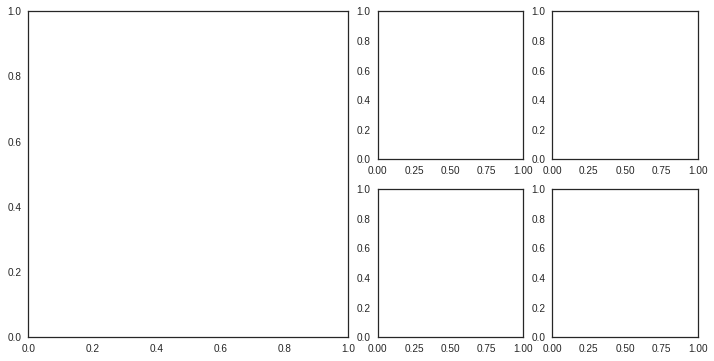

In [12]:
fig = plt.figure(figsize=(12, 6))
ax_fs = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax_ph_neg = plt.subplot2grid((2, 4), (0, 2))
ax_ph_pos = plt.subplot2grid((2, 4), (1, 2))
ax_lm = plt.subplot2grid((2, 4), (0, 3))
ax_lh = plt.subplot2grid((2, 4), (1, 3))

### Loads data into Replay and builds the plots

In [ ]:
replay = Replay(replay_filename='hyperparms_in_action.h5', group_name=group_name)

fs = replay.build_feature_space(ax_fs, layer_name='hidden')
ph = replay.build_probability_histogram(ax_ph_neg, ax_ph_pos)
lh = replay.build_loss_histogram(ax_lh)
lm = replay.build_loss_and_metric(ax_lm, 'acc')

### Plotting the figure for 60th epoch

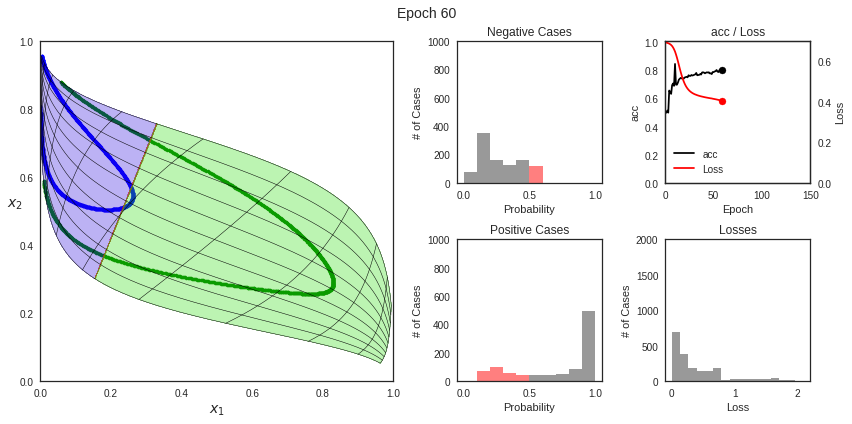

In [22]:
sample_figure = compose_plots([fs, ph, lm, lh], 60)
sample_figure

### Animating the plot

In [6]:
sample_anim = compose_animations([fs, ph, lm, lh])
HTML(sample_anim.to_html5_video())